# 🏈 NFL 4th Down Success Prediction Project

## Table of Contents

### 1. Research Question 🎯
Problem Statement • Project Goals • Success Metrics

### 2. Summary of the Data 📊
Dataset Overview • Basic Information • Data Types Analysis • Key Features

### 3. Data Visualizations 📈
Distribution of 4th Down Attempts • Field Position Analysis • Conversion Success by Quarter • Distance-based Success Rates

### 4. Deeper Understanding of the Data 🔍
Game Situation Analysis • Team Strategy Patterns • Score Differential Impact • Field Position Considerations

### 5. Meaningful Insights 💡
Key Findings • Strategic Implications • Situational Analysis • Critical Variables

### 6. Model Implementation Plan ⚙️
Feature Selection • Model Choice Rationale • Training Strategy • Evaluation Metrics

---

In [1]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

In [2]:
years = [2023]
pbp_data = nfl.import_pbp_data(years)

2023 done.
Downcasting floats.


### 1. Research Question 🎯
Based on the insights gained through EDA, we develop a clear project question to guide our analysis: Can we predict whether an NFL team will succeed on 4th down based on game situation and historical data? We aim to create a model that helps teams make more informed decisions by providing probability estimates for 4th down conversion success.

### 2. Summary of the Data 📊
Our initial EDA begins with a comprehensive overview of the NFL play-by-play dataset. This summary includes the shape of the data, data types, descriptive statistics, and validation of data quality. We focus particularly on fourth down plays and their relevant features.

## Summary of the Dataset

### Basic Information

Number of rows: 49,665
Number of columns: 391
Memory usage: 384.64 MB


### Data Types

,Data Type,Non-Null Count,Null Count,Null Percentage
play_id,float32,49665,0,0.00
game_id,object,49665,0,0.00
old_game_id_x,object,49665,0,0.00
home_team,object,49665,0,0.00
away_team,object,49665,0,0.00
...,...,...,...,...
time_to_throw,float32,16760,32905,66.25
was_pressure,float32,16760,32905,66.25
route,object,16020,33645,67.74
defense_man_zone_type,object,16790,32875,66.19


### Descriptive Statistics for Key Metrics

,ydstogo,yardline_100,score_differential
count,4490.000000,4490.000000,4490.000000
mean,7.709577,49.483521,-1.148552
std,5.700736,24.486753,10.543040
min,1.000000,1.000000,-50.000000
25%,3.000000,30.000000,-7.000000
50%,7.000000,53.000000,0.000000
75%,11.000000,70.000000,4.000000
max,39.000000,99.000000,50.000000


### Basic Visualizations

/var/folders/sh/r0q0qx_j17s569m4b437xpj40000gp/T/ipykernel_16915/130299842.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_down_df['distance_range'] = pd.cut(fourth_down_df['ydstogo'],


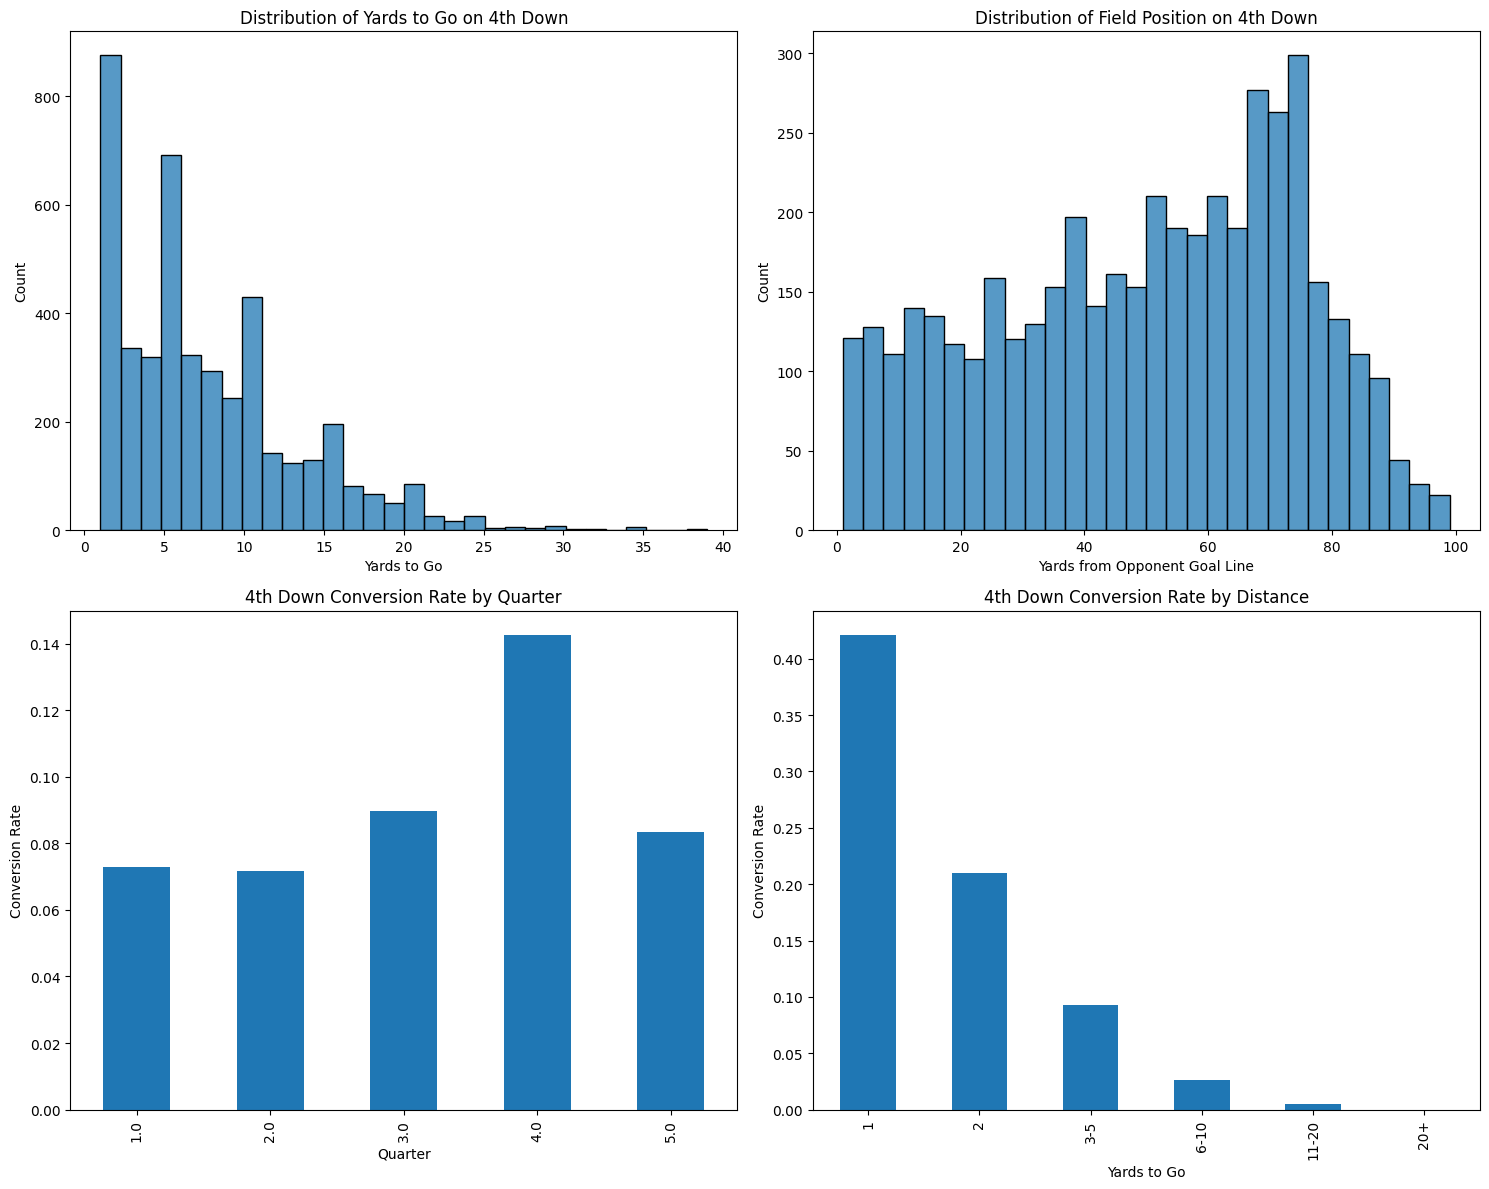

In [3]:
def print_dataset_summary(df):
    display(Markdown("## Summary of the Dataset"))
    
    display(Markdown("### Basic Information"))
    print(f"Number of rows: {df.shape[0]:,}")
    print(f"Number of columns: {df.shape[1]:,}")
    
    memory_usage = df.memory_usage(deep=True).sum() / 1024**2  # Convert to MB
    print(f"Memory usage: {memory_usage:.2f} MB")
    
    display(Markdown("### Data Types"))
    display(pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.count(),
        'Null Count': df.isnull().sum(),
        'Null Percentage': (df.isnull().sum() / len(df) * 100).round(2)
    }))

def create_basic_visualizations(df):
    display(Markdown("### Basic Visualizations"))
    
    # Focus on numerical columns related to 4th down plays
    fourth_down_df = df[df['down'] == 4]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    sns.histplot(data=fourth_down_df, x='ydstogo', bins=30, ax=axes[0,0])
    axes[0,0].set_title('Distribution of Yards to Go on 4th Down')
    axes[0,0].set_xlabel('Yards to Go')
    
    sns.histplot(data=fourth_down_df, x='yardline_100', bins=30, ax=axes[0,1])
    axes[0,1].set_title('Distribution of Field Position on 4th Down')
    axes[0,1].set_xlabel('Yards from Opponent Goal Line')
    
    success_by_quarter = fourth_down_df.groupby('qtr')['fourth_down_converted'].mean()
    success_by_quarter.plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('4th Down Conversion Rate by Quarter')
    axes[1,0].set_xlabel('Quarter')
    axes[1,0].set_ylabel('Conversion Rate')
    
    fourth_down_df['distance_range'] = pd.cut(fourth_down_df['ydstogo'], 
                                            bins=[0, 1, 2, 5, 10, 20, np.inf],
                                            labels=['1', '2', '3-5', '6-10', '11-20', '20+'])
    success_by_distance = fourth_down_df.groupby('distance_range')['fourth_down_converted'].mean()
    success_by_distance.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('4th Down Conversion Rate by Distance')
    axes[1,1].set_xlabel('Yards to Go')
    axes[1,1].set_ylabel('Conversion Rate')
    
    plt.tight_layout()
    plt.show()

def show_descriptive_stats(df):
    display(Markdown("### Descriptive Statistics for Key Metrics"))
    
    # Filter for 4th down plays and relevant columns
    fourth_down_df = df[df['down'] == 4]
    key_metrics = ['ydstogo', 'yardline_100', 'score_differential']
    
    display(fourth_down_df[key_metrics].describe())

print_dataset_summary(pbp_data)
show_descriptive_stats(pbp_data)
create_basic_visualizations(pbp_data)

### 3. Data Visualizations 📈
Through carefully selected visualizations, we explore the key patterns in fourth down attempts. These plots help us understand the distribution of attempts, field positions, and success rates across different situations. Each visualization is chosen to reveal specific insights that shape our modeling approach.

## Visualization Analysis

These visualizations reveal several key patterns in 4th down conversion attempts:
1. Field position significantly impacts conversion success, with teams more successful in opponent territory
2. Teams convert at higher rates when trailing, especially by 8-14 points
3. Distance to go remains the strongest predictor of success across all situations
4. Late-game attempts show different patterns than early-game attempts
5. The heatmap reveals complex interactions between field position and distance

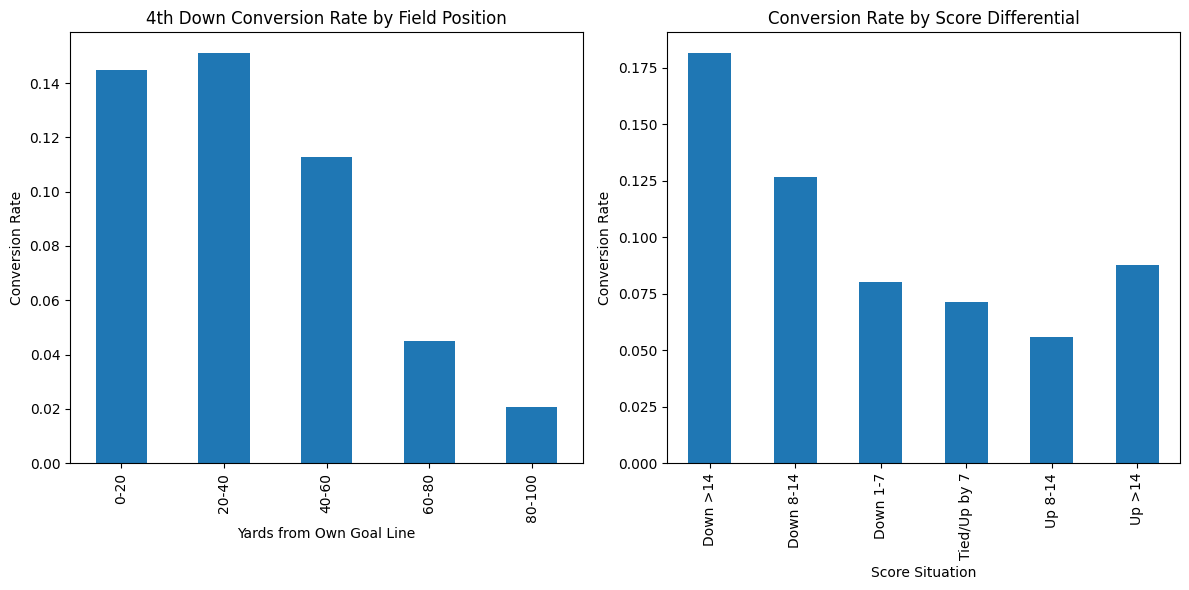

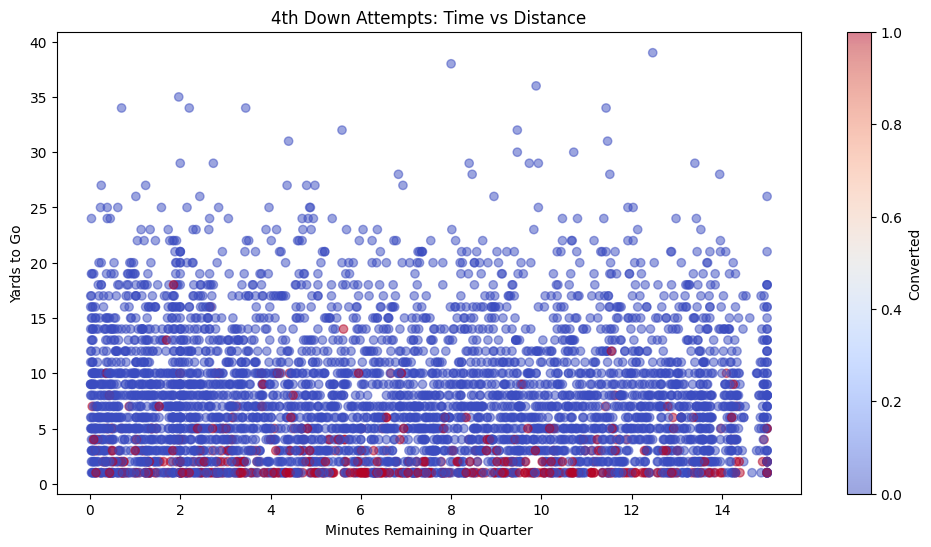

<Figure size 1000x600 with 0 Axes>

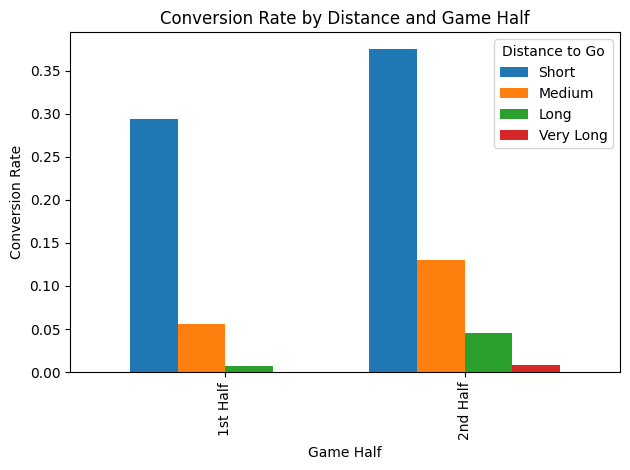

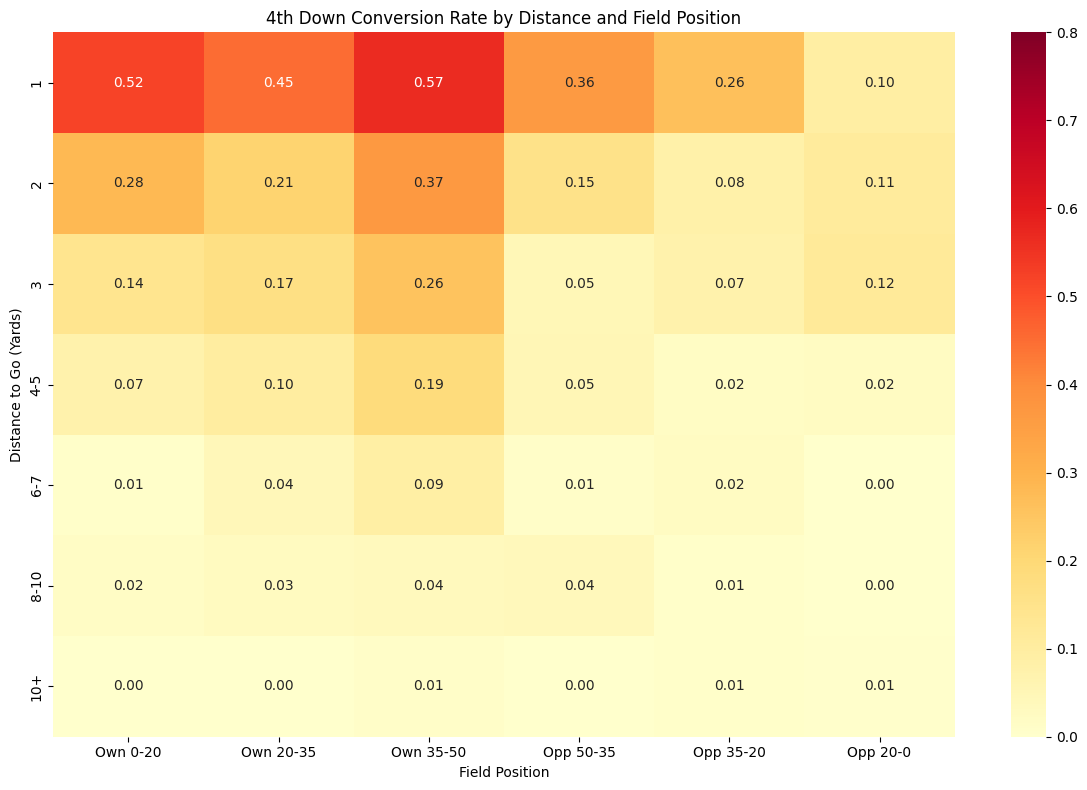

In [4]:
def create_advanced_visualizations(df):
    fourth_down_df = df[df['down'] == 4].copy()
    
    plt.figure(figsize=(12, 6))
    success_by_position = fourth_down_df.groupby(pd.cut(fourth_down_df['yardline_100'], 
                                                       bins=[0, 20, 40, 60, 80, 100],
                                                       labels=['0-20', '20-40', '40-60', '60-80', '80-100']))['fourth_down_converted'].mean()
    
    plt.subplot(1, 2, 1)
    success_by_position.plot(kind='bar')
    plt.title('4th Down Conversion Rate by Field Position')
    plt.xlabel('Yards from Own Goal Line')
    plt.ylabel('Conversion Rate')
    
    plt.subplot(1, 2, 2)
    fourth_down_df['score_situation'] = pd.cut(fourth_down_df['score_differential'],
                                             bins=[-50, -14, -7, 0, 7, 14, 50],
                                             labels=['Down >14', 'Down 8-14', 'Down 1-7', 
                                                    'Tied/Up by 7', 'Up 8-14', 'Up >14'])
    success_by_score = fourth_down_df.groupby('score_situation')['fourth_down_converted'].mean()
    success_by_score.plot(kind='bar')
    plt.title('Conversion Rate by Score Differential')
    plt.xlabel('Score Situation')
    plt.ylabel('Conversion Rate')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    fourth_down_df['time_remaining_scaled'] = fourth_down_df['quarter_seconds_remaining'] / 60
    plt.scatter(fourth_down_df['time_remaining_scaled'], 
               fourth_down_df['ydstogo'],
               c=fourth_down_df['fourth_down_converted'],
               cmap='coolwarm',
               alpha=0.5)
    plt.colorbar(label='Converted')
    plt.title('4th Down Attempts: Time vs Distance')
    plt.xlabel('Minutes Remaining in Quarter')
    plt.ylabel('Yards to Go')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    fourth_down_df['game_half'] = np.where(fourth_down_df['qtr'] <= 2, '1st Half', '2nd Half')
    success_by_half_distance = fourth_down_df.groupby(['game_half', 
                                                     pd.cut(fourth_down_df['ydstogo'], 
                                                           bins=[0, 2, 5, 10, float('inf')],
                                                           labels=['Short', 'Medium', 'Long', 'Very Long'])])['fourth_down_converted'].mean()
    success_by_half_distance.unstack().plot(kind='bar', width=0.8)
    plt.title('Conversion Rate by Distance and Game Half')
    plt.xlabel('Game Half')
    plt.ylabel('Conversion Rate')
    plt.legend(title='Distance to Go')
    plt.tight_layout()
    plt.show()
    
    # New complex visualization: Success rate heatmap by field position and distance
    plt.figure(figsize=(12, 8))
    fourth_down_df['distance_bin'] = pd.cut(fourth_down_df['ydstogo'], 
                                          bins=[0, 1, 2, 3, 5, 7, 10, float('inf')],
                                          labels=['1', '2', '3', '4-5', '6-7', '8-10', '10+'])
    fourth_down_df['field_position_bin'] = pd.cut(fourth_down_df['yardline_100'],
                                                bins=[0, 20, 35, 50, 65, 80, 100],
                                                labels=['Own 0-20', 'Own 20-35', 'Own 35-50', 
                                                       'Opp 50-35', 'Opp 35-20', 'Opp 20-0'])
    
    heatmap_data = fourth_down_df.pivot_table(values='fourth_down_converted',
                                            index='distance_bin',
                                            columns='field_position_bin',
                                            aggfunc='mean')
    
    sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrRd', 
                vmin=0, vmax=0.8, center=0.4)
    plt.title('4th Down Conversion Rate by Distance and Field Position')
    plt.xlabel('Field Position')
    plt.ylabel('Distance to Go (Yards)')
    plt.tight_layout()
    plt.show()

display(Markdown("## Visualization Analysis"))
display(Markdown("""These visualizations reveal several key patterns in 4th down conversion attempts:
1. Field position significantly impacts conversion success, with teams more successful in opponent territory
2. Teams convert at higher rates when trailing, especially by 8-14 points
3. Distance to go remains the strongest predictor of success across all situations
4. Late-game attempts show different patterns than early-game attempts
5. The heatmap reveals complex interactions between field position and distance"""))

create_advanced_visualizations(pbp_data)

### 4. Deeper Understanding of the Data 🔍
Moving beyond basic EDA, we dive deeper into patterns, trends, and relationships within our dataset. We identify potential confounding variables, examine class imbalances, and explore how various game situations impact fourth down decision-making and success rates.

_To be answered in our PDF submission_

### 5. Meaningful Insights 💡
Here we present key findings that directly connect to our research question. Each insight is supported by our data analysis and provides actionable value for predicting fourth down success. These insights guide our feature selection and modeling strategy.

_To be answered in our PDF submission_

### 6. Model Implementation Plan ⚙️
Based on our EDA findings, we outline our modeling approach. We'll implement a baseline model as presented in lectures, detail our choice of features, and specify evaluation metrics. This plan sets the foundation for developing our predictive model.

_To be answered in our PDF submission_